Number of measure errors : %d 0
250


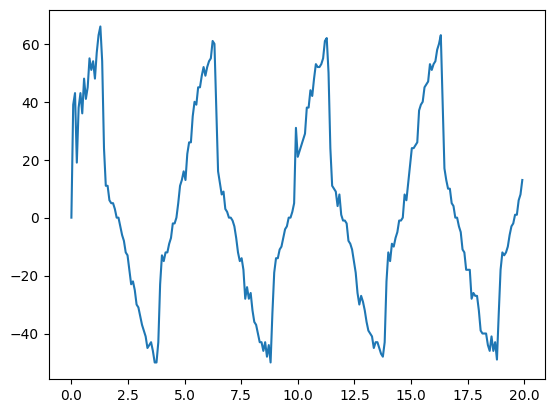

In [19]:
import sys
sys.path.append('../..')
from src.data_processing import process_file
from src.plotting import (
    plot_measured_I, 
    plot_measured_q, 
    plot_measured_q_dot,
    plot_measured_U
)
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Select the measurements
file_path = "../exp12_01/exp12_01_M1_sinus_short_20ms.txt"
# file_path = "data/exp05_02/exp05_02_M1_T_ctrl_5.txt"
df = process_file(file_path)
print(len(df))
df.t = df.t * 80e-3
plt.plot(df.t, df.DXL_Current * 1000/2.69)

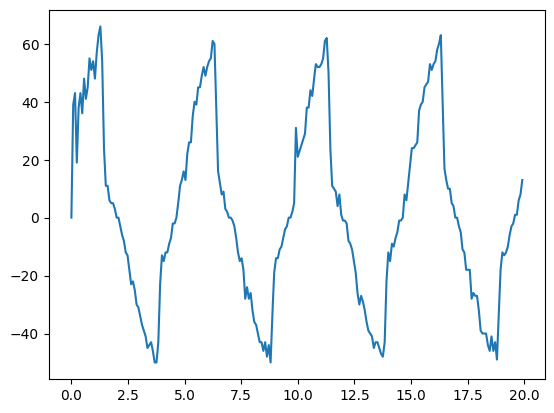

In [21]:
# Assuming DXL_Current is initially sampled at 80ms and is a column in df_constant or similar
# This is a placeholder for how DXL_Current might be created or added to df_constant
# df_constant['DXL_Current'] = np.random.rand(len(df_constant))  # Example DXL_Current values
df_constant = df
# Create a new time array for 20ms sampling
new_time_step = 0.02  # 20ms
new_total_time = df_constant['t'].iloc[-1]  + new_time_step  # Use the last time value as end point
new_time = np.arange(0, new_total_time, new_time_step)

# Constants
time_step = 0.02  # Time step in seconds
period = 5        # Period of the sinus wave in seconds
total_time = 20.24   # Total time for the simulation in seconds

# Time array from 0 to total_time with a step of time_step
time = np.arange(0, total_time, time_step)


# Use numpy to interpolate DXL_Current to the new time array
# First, ensure DXL_Current exists and simulate its original sampling if needed
if 'DXL_Current' not in df_constant.columns:
    # Example: simulate DXL_Current with a simple pattern or load it as needed
    df_constant['DXL_Current'] = np.linspace(0, 100, len(df_constant))  # Placeholder for actual data

# Interpolate DXL_Current values to match the new_time array
dxl_current_interpolated = np.interp(new_time, df_constant['t'], df_constant['DXL_Current'])

# Create a new DataFrame with interpolated values
df_interpolated = pd.DataFrame({
    'time': new_time,
    'q1_l': dxl_current_interpolated * 1000/2.69,
    'q1_r': dxl_current_interpolated * 1000/2.69,
    'q2_l': dxl_current_interpolated * 1000/2.69,
    'q2_r': dxl_current_interpolated * 1000/2.69
})

# You can now merge this DataFrame with your original df_constant if needed, or use it as is.
plt.plot(df_interpolated.time, df_interpolated.q1_l)

# Save to CSV file
csv_filename = 'current_ref_from_measurements.csv'
df_interpolated.to_csv(csv_filename, index=False)